In [66]:
"1"
import numpy as np
import math
niter=0
x0=1
x=x0
while True:
    x=x0+(math.cos(x0)+1)/math.sin(x0)
    niter+=1
    if abs(x - x0) <= 1e-5:
            break  
    x0 = x
print(x,niter)

3.1415832616620487 16


In [67]:
import numpy as np
import math
niter=0
x0=1
x=x0
while True:
    x=(x0+2/x0)/2
    niter+=1
    if abs(x - x0) <= 1e-5:
            break  
    x0 = x
print(x,niter)

1.4142135623746899 4


In [68]:
"2"
import numpy as np
rnd = np . random . RandomState (1234)
n = 10
A = rnd . uniform ( size =( n , n )) + np . diag ([15]* n )
b = rnd . uniform ( size = n )

diagon = np.diag(A)

D = np.diag(diagon)

invD = np.diag(1./diagon)

B = invD @ (D-A)
c = invD @ b
print(np.linalg.norm(B))

0.36436161983015336


In [69]:
#метод Якоби
x0 = np.ones(n)
x = x0
for i in range(100):
    x = B @ x + c
print(A@x-b)

[ 1.11022302e-16  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.11022302e-16  0.00000000e+00 -1.38777878e-17  0.00000000e+00
 -1.38777878e-17  1.11022302e-16]


In [39]:
def jacobi_iteration(A, b, niter):
    
    diagon = np.diag(A)

    D = np.diag(diagon)

    invD = np.diag(1./diagon)
    B = invD @ (D-A)
    c = invD @ b
    
    m = A.shape[0]
    
    x0 = np.ones(m)
    
    errors = np.zeros(n_iter)
    
    for i in range(n_iter):
        x = B @ x0 + c
        delta_x = np.linalg.norm(x - x0)
        errors[i] = delta_x
        
        x0 = x
        
    return x, B, np.array(errors)

In [40]:
n = 10
A = rnd.uniform(size=(n, n))
b = rnd.uniform(size=n)

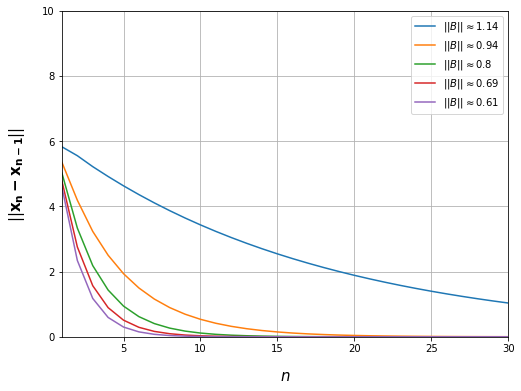

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

n_iter = 30

for j in range(5):
    A_j = A + np.diagflat([j+4]*n)

    x, B, errors = jacobi_iteration(A_j, b, n_iter)

    iterations = np.arange(1, n_iter + 1)
    
    plt.plot(iterations, errors, label=r'$||B|| \approx %s$' % round(np.linalg.norm(B), 2))

    
plt.ylabel(r'$||\mathbf{x_n - x_{n-1}}||$', size=15, labelpad=15)
plt.xlabel(r'$n$', size=15, labelpad=15)
plt.ylim(0, 10)
plt.xlim(1, 30)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# чем меньше диагональное преобладание, тем больше норма матрицы В, тем медленнее происходит сходимость

In [62]:
"4"
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=100):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 100).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    niter = 0
    x = x0 + 2 * eps
    while True:
        x = x0 - f(x0) / fder(x0)
        niter += 1
        if abs(x - x0) <= eps or niter == maxiter:
            break  
        x0 = x
    return x, niter

In [63]:
f = lambda z: z**3 - 1

fder = lambda z: 3 * z**2

import cmath

points = 2000
eps = 1e-5

x_range = np.linspace(-2, 2, points)
y_range = np.linspace(-1, 1, points)

fractal = np.zeros(shape=(points, points))

for i in range(points):
    for j in range(points):
        x = x_range[i]
        y = y_range[j]
        z = complex(x,y)
        root, iteration = newton_iteration(f, fder, z, eps=1e-5, maxiter=1000)
        if abs(root - cmath.exp(2j*cmath.pi*0/3)) <= eps:
            fractal[i, j] = 1
        if abs(root - cmath.exp(2j*cmath.pi*1/3)) <= eps:
            fractal[i, j] = 2
        if abs(root - cmath.exp(2j*cmath.pi*2/3)) <= eps:
            fractal[i, j] = 3

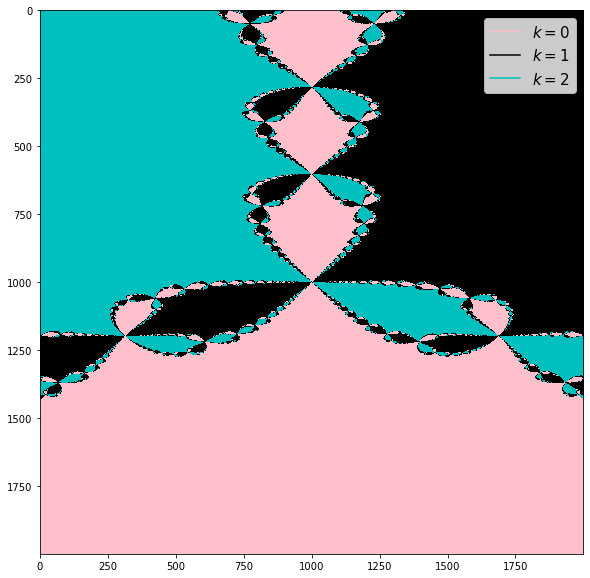

In [64]:
from matplotlib import colors

cmap = colors.ListedColormap(['pink', 'black', 'c'])
bounds = [0, 1, 2, 3]

plt.figure(figsize=[10, 10])

plt.plot(0, 0, color='pink', label=r'$k=0$')
plt.plot(0, 0, color='black', label=r'$k=1$')
plt.plot(0, 0, color='c', label=r'$k=2$')

plt.legend(prop={'size': 15})
plt.imshow(fractal, cmap=cmap)
plt.show()

In [ ]:
"3"
